In [ ]:
import matplotlib.pyplot as plt # importing necessary libraries
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import entropy
import statsmodels.api as sm;
from matplotlib import style
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from google.colab import files


import warnings
warnings.filterwarnings('ignore')

In [ ]:
!gdown --id 1TH4qHB7D_o_bUWOCVgSf6proM8tKxRAZ   # downloading required datasets
!gdown --id 1muMYwhJNk0L7PyD37HbZjKMUySDhm70U

Downloading...
From: https://drive.google.com/uc?id=1TH4qHB7D_o_bUWOCVgSf6proM8tKxRAZ
To: /content/worldometer_coronavirus_daily_data.csv
100% 5.39M/5.39M [00:00<00:00, 77.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1muMYwhJNk0L7PyD37HbZjKMUySDhm70U
To: /content/population_by_country_2020.csv
100% 15.9k/15.9k [00:00<00:00, 24.0MB/s]


###***Data Cleaning and Exploration***

In [ ]:
df=pd.read_csv("worldometer_coronavirus_daily_data.csv")
df.head()

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020-2-15,Afghanistan,0.0,NaN,0.0,0.0,NaN
1,2020-2-16,Afghanistan,0.0,NaN,0.0,0.0,NaN
2,2020-2-17,Afghanistan,0.0,NaN,0.0,0.0,NaN
3,2020-2-18,Afghanistan,0.0,NaN,0.0,0.0,NaN
4,2020-2-19,Afghanistan,0.0,NaN,0.0,0.0,NaN


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df=df.fillna(0)

In [ ]:
print(f"number of records : {df.shape[0]}") 
#number of records

print(f"number of variables:{df.shape[1]}")
#number of variables

number of records : 110464
number of variables:7


In [ ]:
countries=['Germany', 'Mexico', 'Russia', 'Italy']
#list of countries under consideration

##***Absolute number of daily cases in different countries***

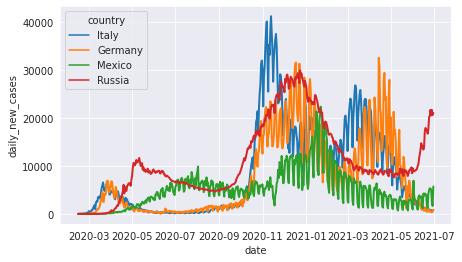

In [ ]:
fig, ax = plt.subplots(figsize = (7, 4))   # plotting the lineplot of cases
sns.set_style("darkgrid")
sns.lineplot(ax=ax,data=df, x="date", y="daily_new_cases", hue="country", 
             ci=95, hue_order=['Italy','Germany','Mexico','Russia'],linewidth='2' );
#plt.title('Daily Cases in Different Countries(absolute)', fontsize=15, weight='bold')
plt.savefig('abs_daily_cases.jpeg', bbox_inches='tight')
plt.show()

In [ ]:
df2=pd.read_csv("worldometer_coronavirus_daily_data.csv")  # loading the dataset for further EDA

##***Relative number of daily cases per 100k population***

In [ ]:
pop_set = pd.read_csv('population_by_country_2020.csv')  # loading csv file for undertaking relative analysis

In [ ]:
pop_set = pop_set[['Country (or dependency)','Population (2020)']]

In [ ]:
pop_set_work = pop_set[pop_set['Country (or dependency)'].isin(countries)]

In [ ]:
y1 = list(df2[df2.country == 'Italy']['daily_new_cases']*100000) / pop_set_work[pop_set_work['Country (or dependency)']=='Italy']['Population (2020)'].iloc[0]
y2 = list(df2[df2.country == 'Germany']['daily_new_cases']*100000) / pop_set_work[pop_set_work['Country (or dependency)']=='Germany']['Population (2020)'].iloc[0]
x1 = list(df2[df2.country == 'Italy']['date'])
x2 = list(df2[df2.country == 'Germany']['date'])

y3 = list(df2[df2.country == 'Mexico']['daily_new_cases']*100000) / pop_set_work[pop_set_work['Country (or dependency)']=='Mexico']['Population (2020)'].iloc[0]
y4 = list(df2[df2.country == 'Russia']['daily_new_cases']*100000) / pop_set_work[pop_set_work['Country (or dependency)']=='Russia']['Population (2020)'].iloc[0]
x3 = list(df2[df2.country == 'Mexico']['date'])
x4 = list(df2[df2.country == 'Russia']['date'])   

#converting absolute data to relative data by transforming into per 100k population 

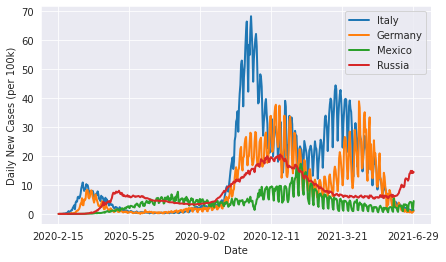

In [ ]:
fig=plt.figure(figsize=(7, 4))      #plotting the relative number of cases in different countries
sns.lineplot(x1,y1,label='Italy',linewidth='2')  # four lineplots plotted on the same graph
sns.lineplot(x2,y2,label='Germany',linewidth='2')
sns.set_style('darkgrid')
sns.lineplot(x3,y3,label='Mexico',linewidth='2')
sns.lineplot(x4,y4,label='Russia',linewidth='2')
plt.xticks([0,100,200,300,400,500], visible=True, rotation="horizontal")
plt.xlabel('Date')
plt.ylabel('Daily New Cases (per 100k)')
#plt.title('Daily Cases in Different Countries(per 100k)', fontsize=15, weight='bold')
plt.savefig('rel_daily_cases.jpeg', bbox_inches='tight')
plt.show();

##**Conclusions** - <br>
We observe that the ***absolute number of cases*** in different countries depicts the magnitude of spread of the virus, taking into consideration the population. This gives us an idea about the stress on the healthcare system of the country, the estimate about health expenditure of the country as well as the number of patients in the country.
<br> On the other hand, ***relative number of cases*** gives us the ability to compare the spread of Covid in different countries, irrespective of the population. Dividing the cases by population, and scaling it to per 100k population gives us the ability to compare and contrast the efficiency any country in controlling the spread of covid. The relative scaling of parameters gives us an understanding about the quality and relative quantity of healthcare facilities in different countries.  

In [ ]:
y5 = list(df2[df2.country == 'Italy']['cumulative_total_cases']*100000) / pop_set_work[pop_set_work['Country (or dependency)']=='Italy']['Population (2020)'].iloc[0]
y6 = list(df2[df2.country == 'Germany']['cumulative_total_cases']*100000) / pop_set_work[pop_set_work['Country (or dependency)']=='Germany']['Population (2020)'].iloc[0]
x5 = list(df2[df2.country == 'Italy']['date'])
x6 = list(df2[df2.country == 'Germany']['date'])


y7 = list(df2[df2.country == 'Mexico']['cumulative_total_cases']*100000) / pop_set_work[pop_set_work['Country (or dependency)']=='Mexico']['Population (2020)'].iloc[0]
y8 = list(df2[df2.country == 'Russia']['cumulative_total_cases']*100000) / pop_set_work[pop_set_work['Country (or dependency)']=='Russia']['Population (2020)'].iloc[0]
x7 = list(df2[df2.country == 'Mexico']['date'])
x8 = list(df2[df2.country == 'Russia']['date']) 

# converting data into relative data for cumulative cases by transforming into per 100k population

##***Cumulative number of cases per 100k population in different countries***

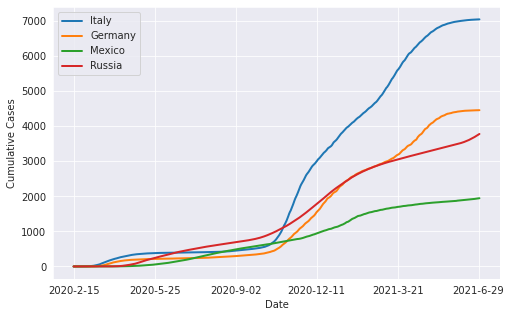

In [ ]:
fig=plt.figure(figsize=(8, 5)) # plotting relative number of cumulative cases in different countries
sns.lineplot(x5,y5,label='Italy',linewidth='2')  # four lineplots plotted on the same graph
sns.lineplot(x6,y6,label='Germany',linewidth='2')
sns.set_style('darkgrid')
sns.lineplot(x7,y7,label='Mexico',linewidth='2')
sns.lineplot(x8,y8,label='Russia',linewidth='2')
plt.xticks([0,100,200,300,400,500], visible=True, rotation="horizontal")
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
#plt.title('Cumulative Cases in Different Countries(per 100k)', fontsize=15, weight='bold')
plt.savefig('cuml_cases_diff_countries.jpeg', bbox_inches='tight')
plt.show();

From the above graph, we conclude that the relative spread of covid in the duration under consideration, was the highest in Italy, followed by Germany, Mexico and Russia

##***Jointplot of daily cases and cumulative cases in Italy***

In [ ]:
df_italy=df[df.country=='Italy']
df_germany=df[df.country=='Germany']  # creating dataframes for Italy and Germany data for plotting jointplots

<Figure size 720x360 with 0 Axes>

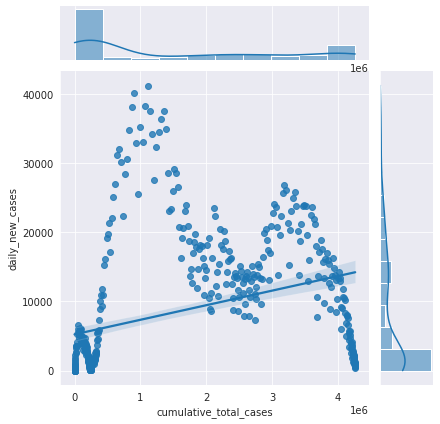

In [ ]:
fig=plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.jointplot(y='daily_new_cases', x='cumulative_total_cases',kind='reg', data=df_italy )
#plotting joinplot of daily cases and cumulative cases in Italy
plt.savefig('italy_cumulative_vs_daily_jointplot.png', bbox_inches='tight')
plt.show();

In [ ]:
data = [df_italy["cumulative_total_cases"], df_germany["cumulative_total_cases"]]

headers = ["italy_cases", "germany_cases"]

df_italy_germany = pd.concat(data, axis=1, keys=headers)
df_italy_germany=df_italy_germany.fillna(0)  

In [ ]:
df_italy_germany.head()

,italy_cases,germany_cases
38678,0.0,16.0
38679,0.0,16.0
38680,0.0,16.0
38681,0.0,16.0
38682,0.0,16.0


In [ ]:
df_italy_germany.max()

italy_cases      4259909.0
germany_cases    3736223.0
dtype: float64

##***Contour Plot of cumulative cases in Italy and Germany***

<Figure size 360x360 with 0 Axes>

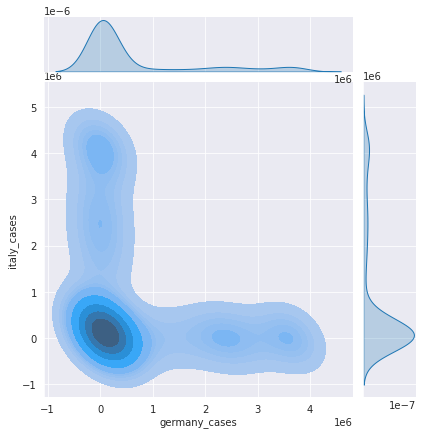

In [ ]:
fig=plt.figure(figsize=(5,5))
sns.jointplot(y='italy_cases', x='germany_cases',kind='kde', fill=True,data=df_italy_germany )  
#plotting joint contour plot of cumulative cases in Italy and Germany
sns.set_style('darkgrid')
plt.savefig('italy_germany_kde_contour.jpeg', bbox_inches='tight')
plt.show();

##***This can be done for other pairs of countries as well, but one graph suffices to describe the point made below***

The above graph represents that there is a strong corrlation between the cumulative cases in germany and italy, when the number of cases is less, but with the passage of time, the varition between cumulative cases everyday increases, and hence we see contours corresponding to less cumulative case region only. Highly concentrated contours in initial phase of the pandemic(when cumulative cases were low describes that Italy and Germany had similar expansion of Covid initially(inspite of dissimlar populations, showing that saturation in the Erdos-Renyi graph didn't occur initially, meaning that total cases were similar irrespective of population). 

In [ ]:
df_listed=df2[df2.country.isin(countries)]  # creating a dataframe for plotting violin plot, with countries in the list of countries under consideration

##***Violin plot for distribution of daily new cases***

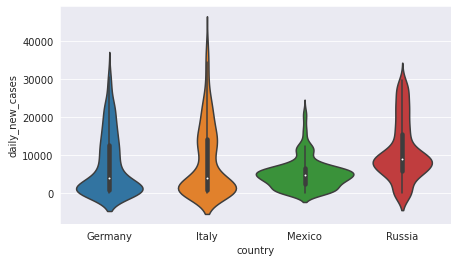

In [ ]:
fig=plt.figure(figsize=(7, 4))
sns.set_style('darkgrid')
sns.violinplot(x='country', y='daily_new_cases', width=1,split=True ,data=df_listed)
#plotting violin plot for distribution of daily cases in different countries
#plt.title('Distribution of daily cases in different countries', fontsize=15, weight='bold')
plt.savefig('violin_daily_cases.jpeg', bbox_inches='tight')
plt.show()

The above violin plot for distribution of daily cases shows that majority of the days in Mexico had no cases at all, while there were very less days in Italy which hadn't seen any case of Covid-19. Also, the maximum number of new cases at any day came in Italy(shown by the highest peak), which given its smaller population than other countries, was very devastating. 

In [ ]:
df_new=df[df['country'].isin(['India', 'Italy', 'Germany', 'Mexico', 'Russia'])]  # new dataframe for EDA on correlation of number of cases in different countries

In [ ]:
df_new

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
38678,2020-02-15,Germany,16.0,0.0,13.0,0.0,0.0
38679,2020-02-16,Germany,16.0,0.0,13.0,0.0,0.0
38680,2020-02-17,Germany,16.0,0.0,9.0,0.0,0.0
38681,2020-02-18,Germany,16.0,0.0,7.0,0.0,0.0
38682,2020-02-19,Germany,16.0,0.0,7.0,0.0,0.0
...,...,...,...,...,...,...,...
80841,2021-06-26,Russia,5430753.0,21665.0,354084.0,132683.0,619.0
80842,2021-06-27,Russia,5451291.0,20538.0,361295.0,133282.0,599.0
80843,2021-06-28,Russia,5472941.0,21650.0,369708.0,133893.0,611.0
80844,2021-06-29,Russia,5493557.0,20616.0,374975.0,134545.0,652.0


##***Correlation Matrices for cumulative cases and daily new cases***

In [ ]:
df_corr_cuml_india=df_new[df_new['country']=="India"]['cumulative_total_cases']
df_corr_cuml_india.reset_index(inplace=True, drop=True)
df_corr_cuml_italy=df_new[df_new['country']=="Italy"]['cumulative_total_cases']
df_corr_cuml_italy.reset_index(inplace=True, drop=True)
df_corr_cuml_mexico=df_new[df_new['country']=="Mexico"]['cumulative_total_cases']
df_corr_cuml_mexico.reset_index(inplace=True, drop=True)
df_corr_cuml_germany=df_new[df_new['country']=="Germany"]['cumulative_total_cases']
df_corr_cuml_germany.reset_index(inplace=True, drop=True)
df_corr_cuml_russia=df_new[df_new['country']=="Russia"]['cumulative_total_cases']
df_corr_cuml_russia.reset_index(inplace=True, drop=True)
#creating dataframes for concatenating into newer dataframe for making correlation matrix

In [ ]:
data = [df_corr_cuml_india, df_corr_cuml_italy, df_corr_cuml_mexico, 
        df_corr_cuml_germany, df_corr_cuml_russia]


headers = ["India", "Italy", "Mexico", "Germany", "Russia"]

df3_correlation_cumulative= pd.concat(data, axis=1,keys=headers)
#dataframe for correlation matrix created

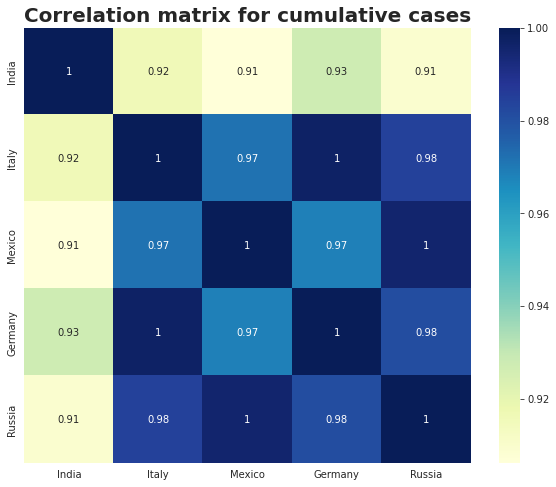

In [ ]:
fig=plt.figure(figsize=(10,8))
sns.heatmap(df3_correlation_cumulative.corr(), cmap='YlGnBu',annot=True)
#plotting correlation matrix for cumulative cases in different countries
plt.title('Correlation matrix for cumulative cases', weight='bold', fontsize=20)
plt.savefig('cumulative_cases_corr.jpeg', bbox_inches='tight')
plt.show()

We observe that the correlation between the cumulative total cases is almost 1 for all countries with each other. This shows that none of the countries under consideration were left out in the harm to life caused by the pandemic. Also, the relation between cumulative cases with time of each country is almost the same, which is depicted in the line graph presented above. 

In [ ]:
df_corr_india=df_new[df_new['country']=="India"]['daily_new_cases']
df_corr_india.reset_index(inplace=True, drop=True)
df_corr_italy=df_new[df_new['country']=="Italy"]['daily_new_cases']
df_corr_italy.reset_index(inplace=True, drop=True)
df_corr_mexico=df_new[df_new['country']=="Mexico"]['daily_new_cases']
df_corr_mexico.reset_index(inplace=True, drop=True)
df_corr_germany=df_new[df_new['country']=="Germany"]['daily_new_cases']
df_corr_germany.reset_index(inplace=True, drop=True)
df_corr_russia=df_new[df_new['country']=="Russia"]['daily_new_cases']
df_corr_russia.reset_index(inplace=True, drop=True)
# creating new single column dataframes for concatenating into one dataframe for plotting the correlation matrix

In [ ]:
data = [df_corr_india, df_corr_italy, df_corr_mexico, 
        df_corr_germany, df_corr_russia]

headers = ["India", "Italy", "Mexico", "Germany", "Russia"]

df4_correlation_daily= pd.concat(data, axis=1,keys=headers)
# creating new dataframe for plotting correlation matrix of daily cases in different countries

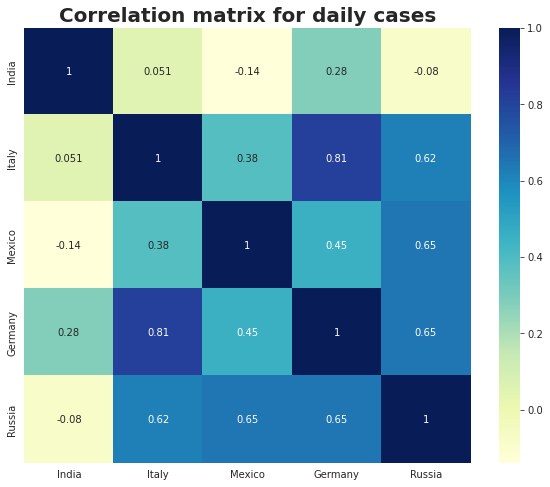

In [ ]:
fig=plt.figure(figsize=(10,8))
sns.heatmap(df4_correlation_daily.corr(), cmap='YlGnBu',annot=True)
#plotting correlation matrix for daily cases in different countries
plt.title('Correlation matrix for daily cases', weight='bold', fontsize=20)
plt.savefig('daily_cases_corr.jpeg', bbox_inches='tight')
plt.show()

For the correlation matrix of daily new cases, we observe that similar countries faced similar patterns of spread of Covid-19 virus amongst its population with time. <br>
We observe that the daly cases in Italy and Germany are closely correlated, which shows that similar strains, gepgraphical proximity, similar healthcare infrastructure led to almost equal spread of the virus in both the countries.<br>
On the other hand, we find that cases in countries that aren't alike in the above terms, didn't have similar trends of Covid spread with time. Eg: Spread of Covid in India was relatively uncorrelated with other countries in Europe and North America. 

In [ ]:
#files.download('daily_cases_corr.jpeg')
#files.download('abs_daily_cases.jpeg')
#files.download('rel_daily_cases.jpeg')
#files.download('cuml_cases_diff_countries.jpeg')
#files.download('italy_cumulative_vs_daily_jointplot.png')
#files.download('italy_germany_kde_contour.jpeg')
#files.download('violin_daily_cases.jpeg')